In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
# Load data from all four NYC taxi files into a single data frame.

filenames = ['../data/nyc_taxi_2019-01.csv', '../data/nyc_taxi_2019-07.csv',
             '../data/nyc_taxi_2020-01.csv', '../data/nyc_taxi_2020-07.csv']

all_dfs = [pd.read_csv(one_filename,
           usecols=['tpep_pickup_datetime', 'passenger_count', 'trip_distance',
                    'fare_amount','extra','mta_tax','tip_amount','tolls_amount',
                    'improvement_surcharge','total_amount','congestion_surcharge'],
           parse_dates=['tpep_pickup_datetime'])
           for one_filename in filenames]

df = pd.concat(all_dfs)


In [3]:
df.shape

(21183631, 11)

In [4]:
df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-01-01 00:46:40,1.0,1.5,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,2019-01-01 00:59:47,1.0,2.6,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2018-12-21 13:48:30,3.0,0.0,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2018-11-28 15:52:25,5.0,0.0,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2018-11-28 15:56:57,5.0,0.0,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


<AxesSubplot:xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

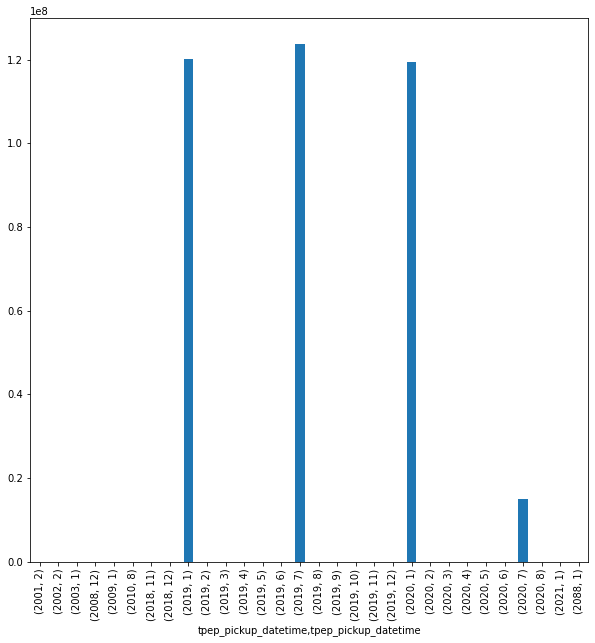

In [5]:
# Bar plot showing total amount paid in taxi rides, per month + year

df.groupby([df['tpep_pickup_datetime'].dt.year, df['tpep_pickup_datetime'].dt.month])['total_amount'].sum().plot.bar(figsize=(10,10))

<AxesSubplot:xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

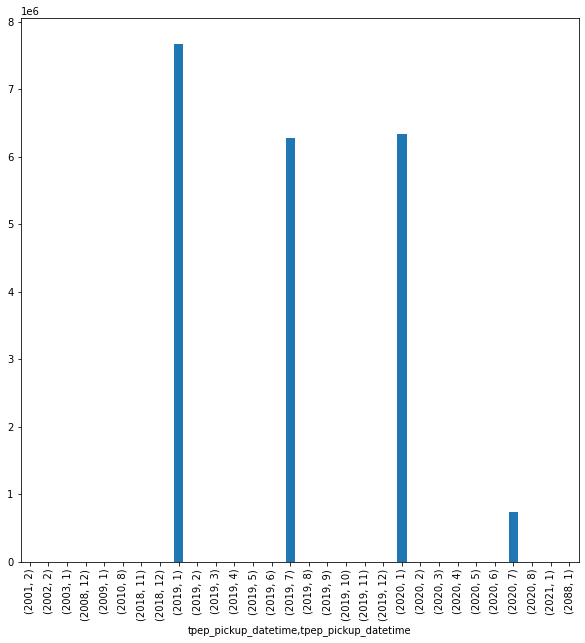

In [6]:
# Create a bar plot that shows how many rides there were in each month and year of our data set.
# It's fine if there are "holes" in the bar plot.

df.groupby([df['tpep_pickup_datetime'].dt.year, df['tpep_pickup_datetime'].dt.month])['passenger_count'].count().plot.bar(figsize=(10,10))

<AxesSubplot:xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

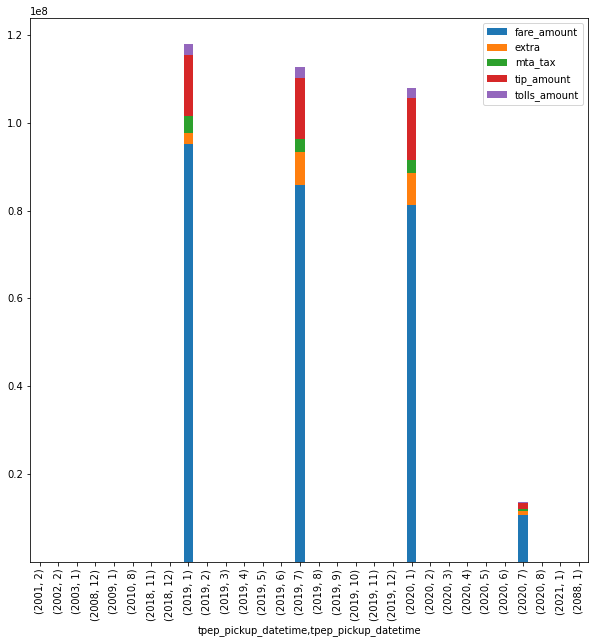

In [7]:
# Bar plot showing fare_amount, extra, mta_tax, tip_amount, and tolls_amount 
# paid in taxi rides, per month + year, stacked

df.groupby([df['tpep_pickup_datetime'].dt.year, 
            df['tpep_pickup_datetime'].dt.month])[['fare_amount','extra','mta_tax','tip_amount','tolls_amount']].sum().plot.bar(stacked=True, 
                                                                                                            figsize=(10,10))

<AxesSubplot:xlabel='passenger_count'>

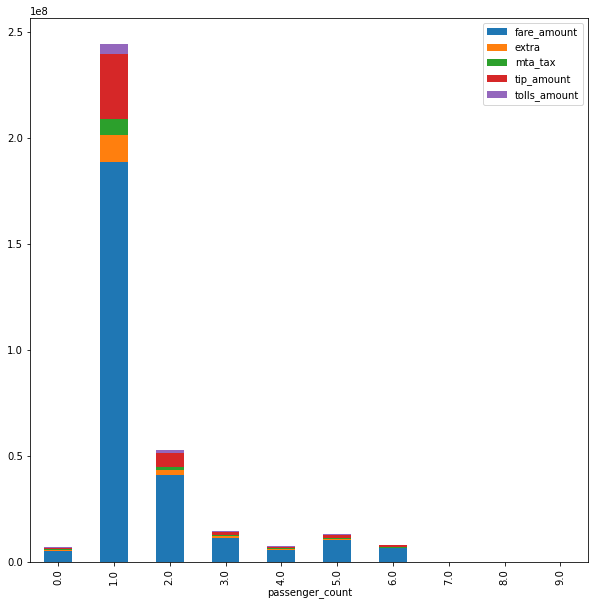

In [8]:
# Bar plot showing fare_amount, extra, mta_tax, tip_amount, and tolls_amount 
# paid in taxi rides, per number of passengers, stacked

df.groupby(df['passenger_count'])[['fare_amount','extra','mta_tax','tip_amount','tolls_amount']].sum().plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:ylabel='Frequency'>

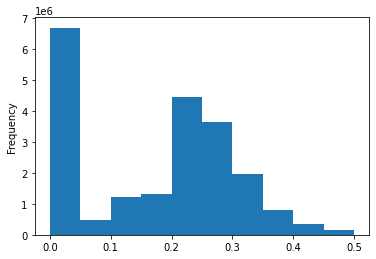

In [9]:
# Create a histogram showing the frequency of each tipping percentage
# (calculating tip_amount / total_fare) 
# where the pefillnrcentage is between 0% and 50%

df = df[df['fare_amount'] > 0]
df['tip_percentage'] = df['tip_amount'] / df['fare_amount']
df.loc[df['tip_percentage'] <= .50, 'tip_percentage'].plot.hist()